In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [17]:
bike = pd.read_csv('metrobike.csv', index_col = None)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
Trip ID                              132427 non-null int64
Duration                             132427 non-null int64
Start Time                           132427 non-null object
End Time                             132427 non-null object
Starting Station ID                  132408 non-null float64
Starting Station Latitude            132379 non-null float64
Starting Station Longitude           132379 non-null float64
Ending Station ID                    132331 non-null float64
Ending Station Latitude              131376 non-null float64
Ending Station Longitude             131376 non-null float64
Bike ID                              132417 non-null float64
Plan Duration                        131661 non-null float64
Trip Route Category                  132427 non-null object
Passholder Type                      132427 non-null object
Starting Lat-Long                    98622 

In [78]:
# bike['Trip ID'].groupby(bike['Starting Station ID']).count()

In [12]:
# bike['Trip ID'].groupby(bike['Ending Station ID']).count()

In [52]:
print(len(bike['Bike ID'].unique()))
print(len(bike['Starting Station ID'].unique()))
print(len(bike['Ending Station ID'].unique()))

764
68
68


In [42]:
x = sorted(bike['Passholder Type'].unique())
y = bike['Trip ID'].groupby(bike['Passholder Type']).count()

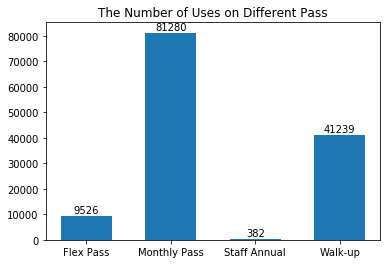

In [49]:
plt.bar(x, y, width = 0.6)
plt.title('The Number of Uses on Different Pass')
for k, z in enumerate(y):
    plt.text(k, z + 4000, '%s'%z, ha = 'center', va = 'top')
plt.show()

In [15]:
bike['Trip ID'].groupby(bike['Trip Route Category']).count()

Trip Route Category
One Way       119629
Round Trip     12798
Name: Trip ID, dtype: int64

In [18]:
bike['Duration'].groupby(bike['Trip Route Category']).mean()

Trip Route Category
One Way       1371.794130
Round Trip    3267.974684
Name: Duration, dtype: float64

In [19]:
bike['Duration'].groupby(bike['Passholder Type']).mean()

Passholder Type
Flex Pass       1192.655889
Monthly Pass     858.766978
Staff Annual    2706.753927
Walk-up         3000.414656
Name: Duration, dtype: float64

In [32]:
x = sorted(bike['Passholder Type'].unique())
y = round(bike['Duration'].groupby(bike['Passholder Type']).mean(),2)

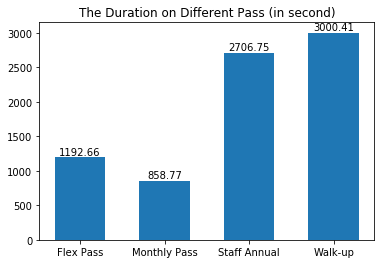

In [41]:
plt.bar(x, y, width = 0.6)
plt.title('The Duration on Different Pass (in second)')
for k, z in enumerate(y):
    plt.text(k, z + 150, '%s'%z, ha = 'center', va = 'top')
plt.show()

In [53]:
def get_year(value):
    return value.split('-')[0]
def get_month(value):
    return value.split('-')[1]
bike['year'] = bike['Start Time'].apply(get_year)
bike['month'] = bike['Start Time'].apply(get_month)

In [63]:
print(bike['Trip ID'].groupby(bike['year']).count())
print(np.mean(bike[bike['year'] == '2016']['Trip ID'].groupby(bike['month']).count()))
print(np.mean(bike[bike['year'] == '2017']['Trip ID'].groupby(bike['month']).count()))

year
2016    98641
2017    33786
Name: Trip ID, dtype: int64
16440.166666666668
11262.0


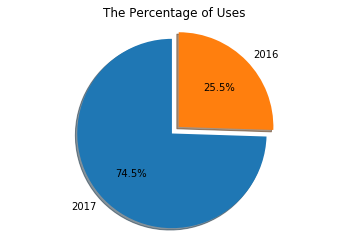

In [62]:
x = bike['Trip ID'].groupby(bike['year']).count()
labels = bike['year'].unique()
explode = (0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(x, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('The Percentage of Uses')

plt.show()

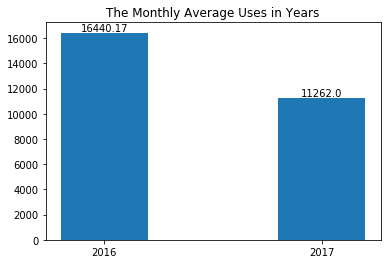

In [74]:
x = ['2016', '2017']
y = [round(np.mean(bike[bike['year'] == '2016']['Trip ID'].groupby(bike['month']).count()),2), 
     round(np.mean(bike[bike['year'] == '2017']['Trip ID'].groupby(bike['month']).count()),3)]
plt.bar(x, y, width = 0.4)
plt.title('The Monthly Average Uses in Years')
for k, z in enumerate(y):
    plt.text(k, z + 750, '%s'%z, ha = 'center', va = 'top')
plt.show()

In [75]:
bike[bike['year'] == '2016']['Trip ID'].groupby([bike['month'], bike['Passholder Type']]).count()

month  Passholder Type
07     Flex Pass           1668
       Monthly Pass        9362
       Walk-up              400
08     Flex Pass           1591
       Monthly Pass       13185
       Walk-up             9372
09     Flex Pass           1181
       Monthly Pass       10645
       Walk-up             8035
10     Flex Pass           1266
       Monthly Pass       10742
       Staff Annual         157
       Walk-up             5994
11     Flex Pass            901
       Monthly Pass        9379
       Staff Annual          93
       Walk-up             4057
12     Flex Pass            627
       Monthly Pass        6960
       Staff Annual         132
       Walk-up             2894
Name: Trip ID, dtype: int64

In [76]:
bike[bike['year'] == '2017']['Trip ID'].groupby([bike['month'], bike['Passholder Type']]).count()

month  Passholder Type
01     Flex Pass           670
       Monthly Pass       6401
       Walk-up            3276
02     Flex Pass           599
       Monthly Pass       6155
       Walk-up            2779
03     Flex Pass          1023
       Monthly Pass       8451
       Walk-up            4432
Name: Trip ID, dtype: int64